Imports


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings('ignore')

Importing dataset and examining it


In [83]:
df=pd.read_csv('data.csv')
print("Data set imported")
# y = df['diagnosis']


Data set imported


In [84]:
df
#  Diagnosis (M = malignant, B = benign)
# Class distribution: 357 benign, 212 malignant

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [85]:
df.shape

(569, 33)

In [86]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [88]:
df.isnull().sum()
# Viewing the null values

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [89]:
# Converting column diagnosis into numreic values --> M=1 and B=0
le=preprocessing.LabelEncoder()
df["diagnosis"] = le.fit_transform(df["diagnosis"])
df


id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1326.0          0.08474           0.07864         0.08690   
2       1203.0          0.10960           0.15990         0.19740   
3        386.1          0.14250           0.28390         0.24140   
4       1297.0          0.10030           0.13280         0.19800   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590         0.24390   
565     1261.0          0.09780           0.10340         0.14400   
566      858.1          0.08455           0.10230         0.09251   
567     1265.0          0.11780           0.27700         0.35140   
568      181.0          0.05263           0.04362         0.00000   

     concave points_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                0.14710  ...          17.33           184.60      2019.0   
1                0.07017  ...          23.41           158.80      1956.0   
2                0.12790  ...          25.53           152.50      1709.0   
3                0.10520  ...          26.50            98.87       567.7   
4                0.10430  ...          16.67           152.20      1575.0   
..                   ...  ...            ...              ...         ...   
564              0.13890  ...          26.40           166.10      2027.0   
565              0.09791  ...          38.25           155.00      1731.0   
566              0.05302  ...          34.12           126.70      1124.0   
567              0.15200  ...          39.42           184.60      1821.0   
568              0.00000  ...          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
0                  0.2654          0.4601                  0.11890   
1                  0.1860          0.2750                  0.08902   
2                  0.2430          0.3613                  0.08758   
3                  0.2575          0.6638                  0.17300   
4                  0.1625          0.2364                  0.07678   
..                    ...             ...                      ...   
564                0.2216          0.2060                  0.07115   
565                0.1628          0.2572                  0.06637   
566                0.1418          0.2218

Preprocessing


In [90]:
# Data cleaning
df.drop(['Unnamed: 32'], axis=1, inplace=True)
df=df.drop("id",axis=1)
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

array([[<Axes: title={'center': 'diagnosis'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'cent

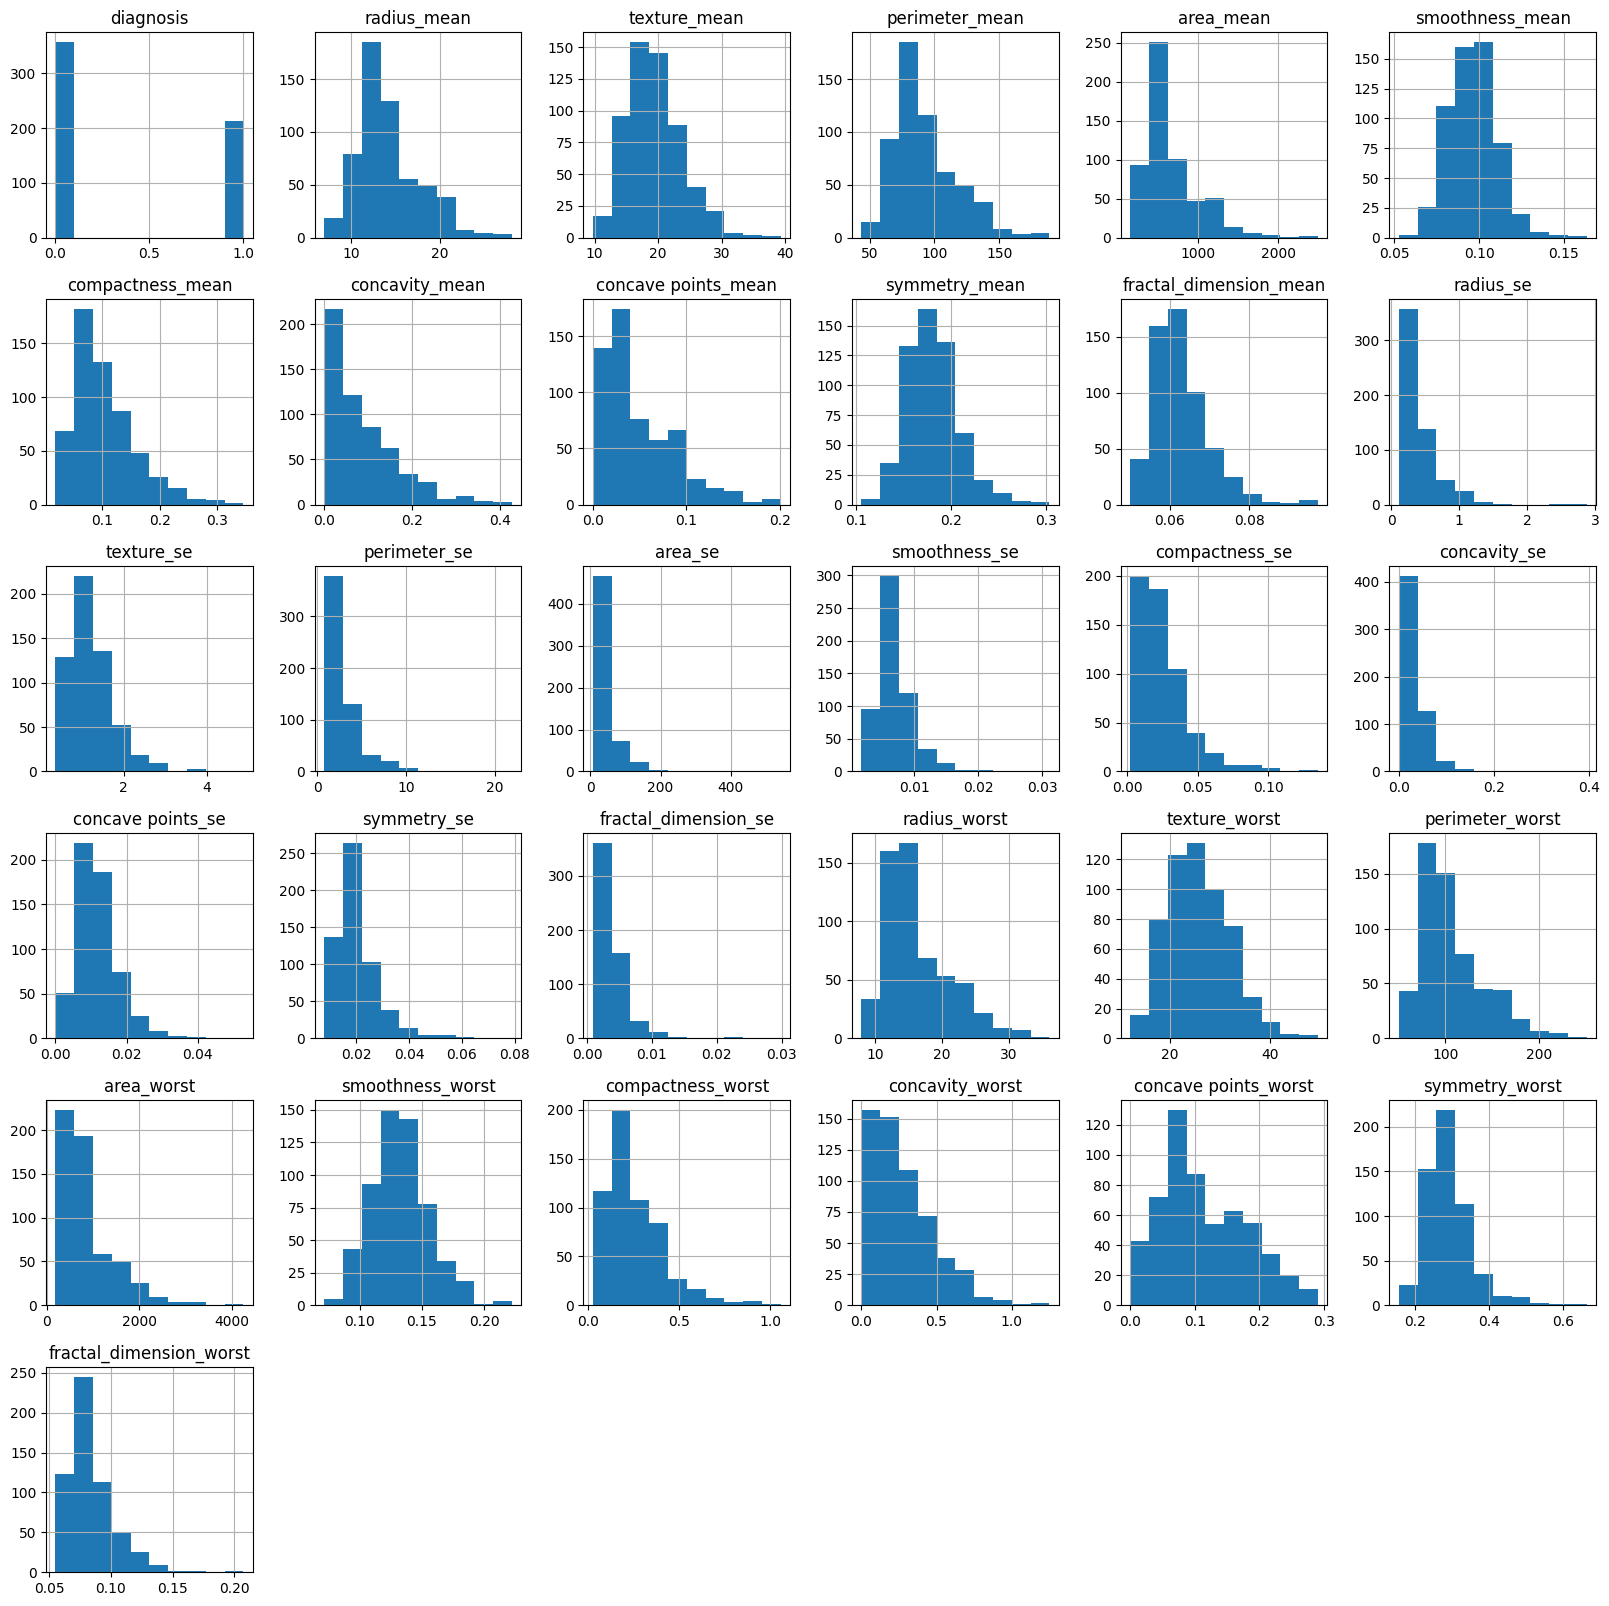

In [91]:
#Histogram of all data
df.hist(figsize=(20,20))

In [92]:
df.describe().T

count        mean         std         min  \
diagnosis                569.0    0.372583    0.483918    0.000000   
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
diagnosis                  0.000000    0.000000     1.000000     1.00000  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.72000

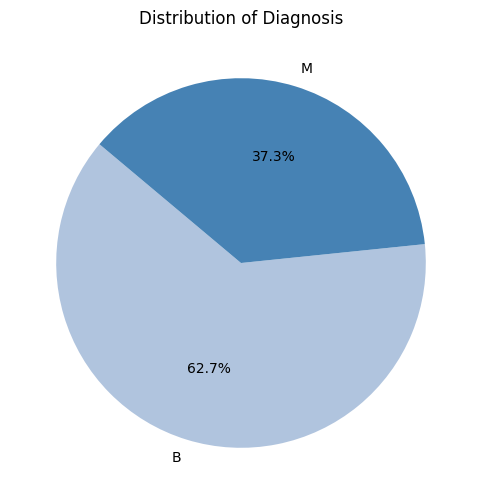

In [93]:
z= df['diagnosis'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(z, labels=['B','M'], autopct='%1.1f%%', startangle=140, colors=['lightsteelblue', 'steelblue'])
plt.title('Distribution of Diagnosis')
plt.show()

array([[<Axes: title={'center': 'diagnosis'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'cent

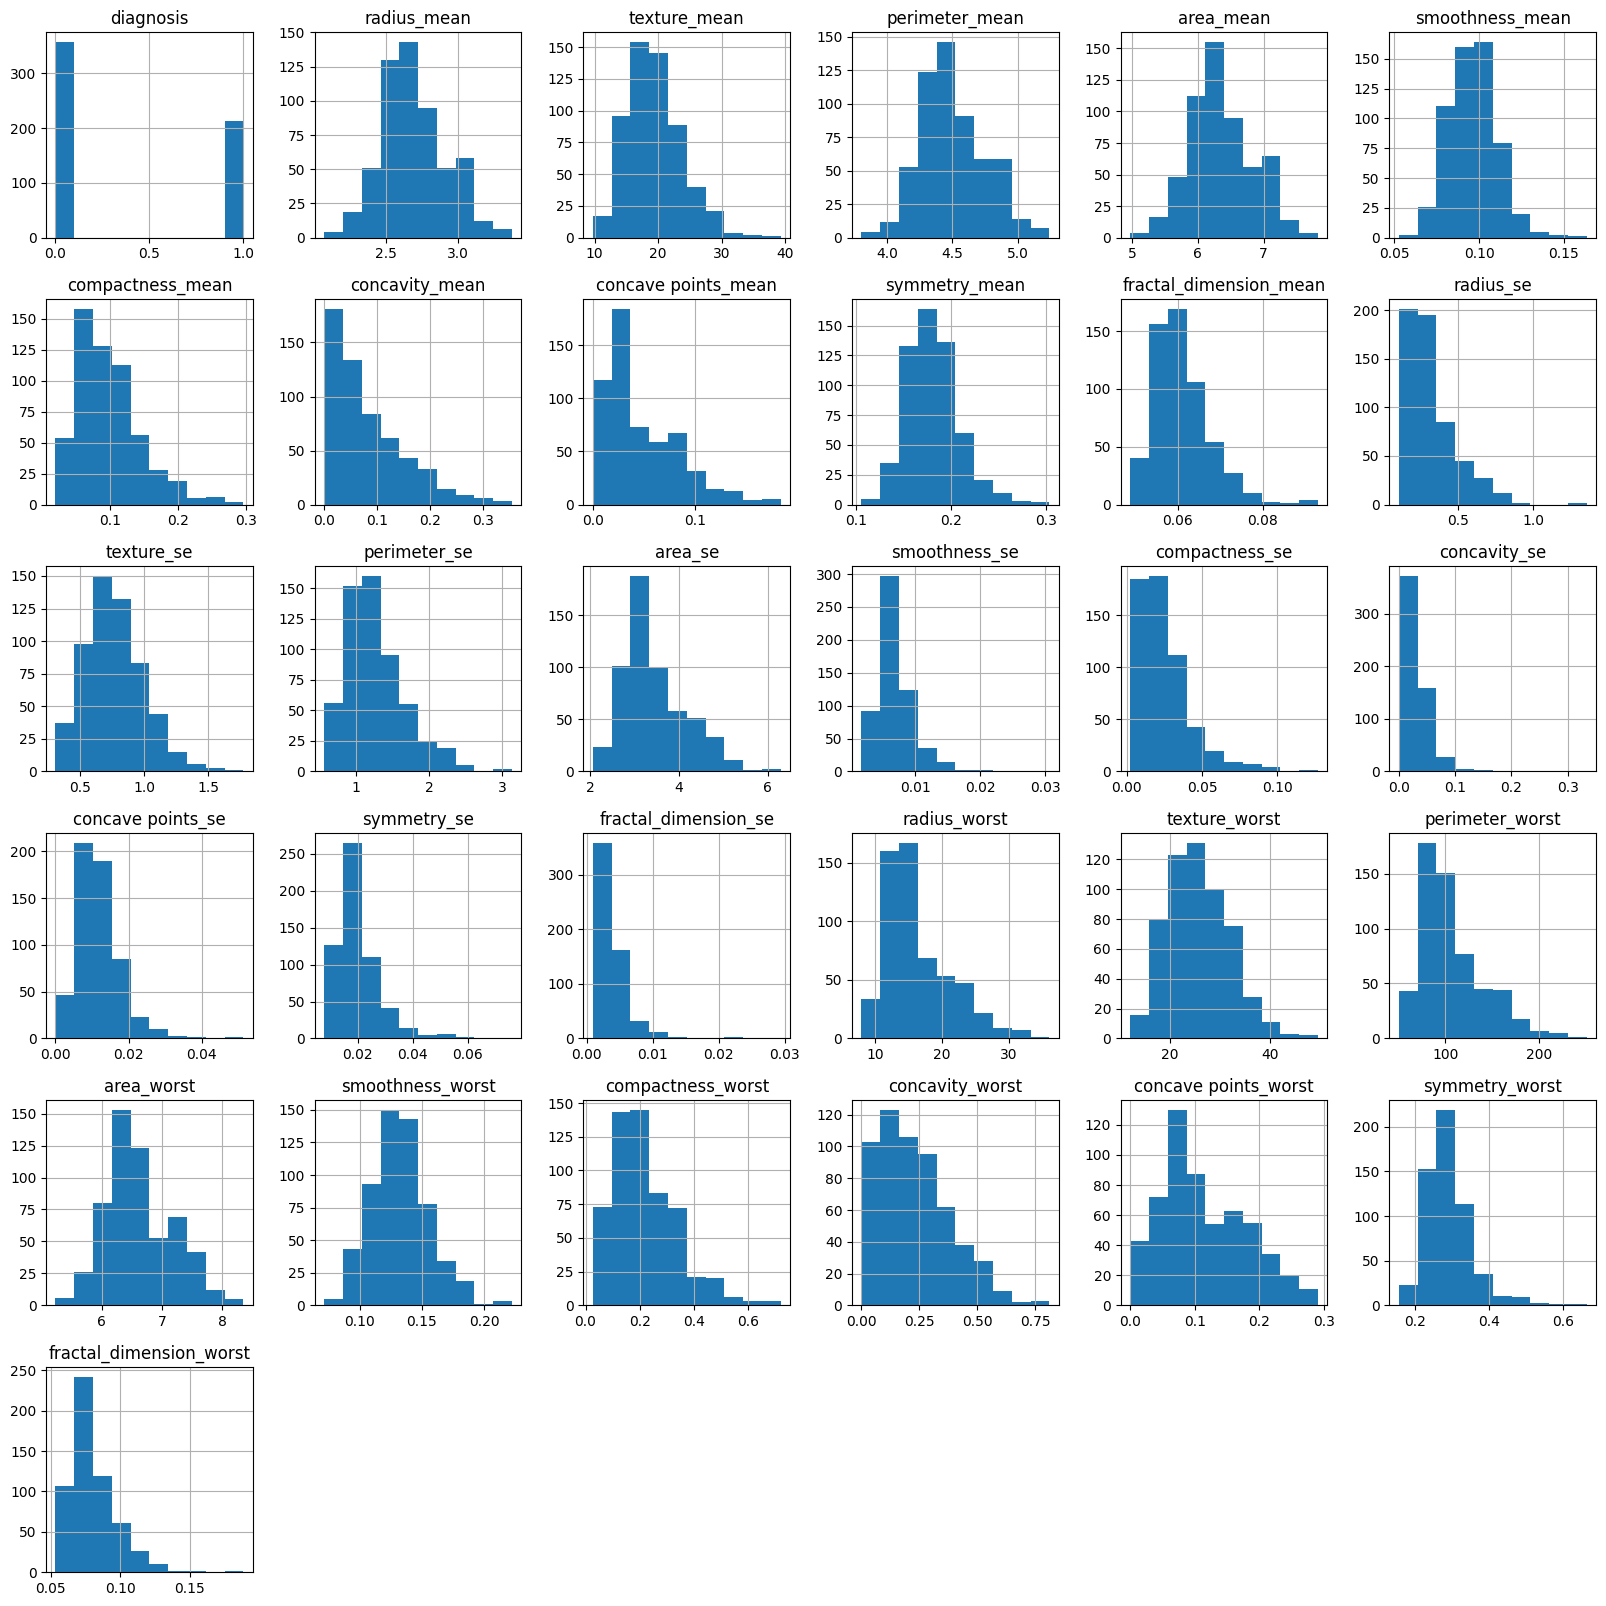

In [94]:
#   Fixing skewness
df['radius_mean']=np.log(df['radius_mean']+1)
df['perimeter_mean']=np.log(df['perimeter_mean']+1)
df['area_mean']=np.log(df['area_mean']+1)
df['compactness_mean']=np.log(df['compactness_mean']+1)
df['concavity_mean']=np.log(df['concavity_mean']+1)
df['concave points_mean']=np.log(df['concave points_mean']+1)
df['fractal_dimension_mean']=np.log(df['fractal_dimension_mean']+1)
df['radius_se']=np.log(df['radius_se']+1)
df['texture_se']=np.log(df['texture_se']+1)
df['perimeter_se']=np.log(df['perimeter_se']+1)
df['area_se']=np.log(df['area_se']+1)
df['smoothness_se']=np.log(df['smoothness_se']+1)
df['compactness_se']=np.log(df['compactness_se']+1)
df['concavity_se']=np.log(df['concavity_se']+1)
df['concave points_se']=np.log(df['concave points_se']+1)
df['symmetry_se']=np.log(df['symmetry_se']+1)
df['fractal_dimension_se']=np.log(df['fractal_dimension_se']+1)
df['area_worst']=np.log(df['area_worst']+1)
df['compactness_worst']=np.log(df['compactness_worst']+1)
df['concavity_worst']=np.log(df['concavity_worst']+1)
df['fractal_dimension_worst']=np.log(df['fractal_dimension_worst']+1)


df.hist(figsize=(20,20))


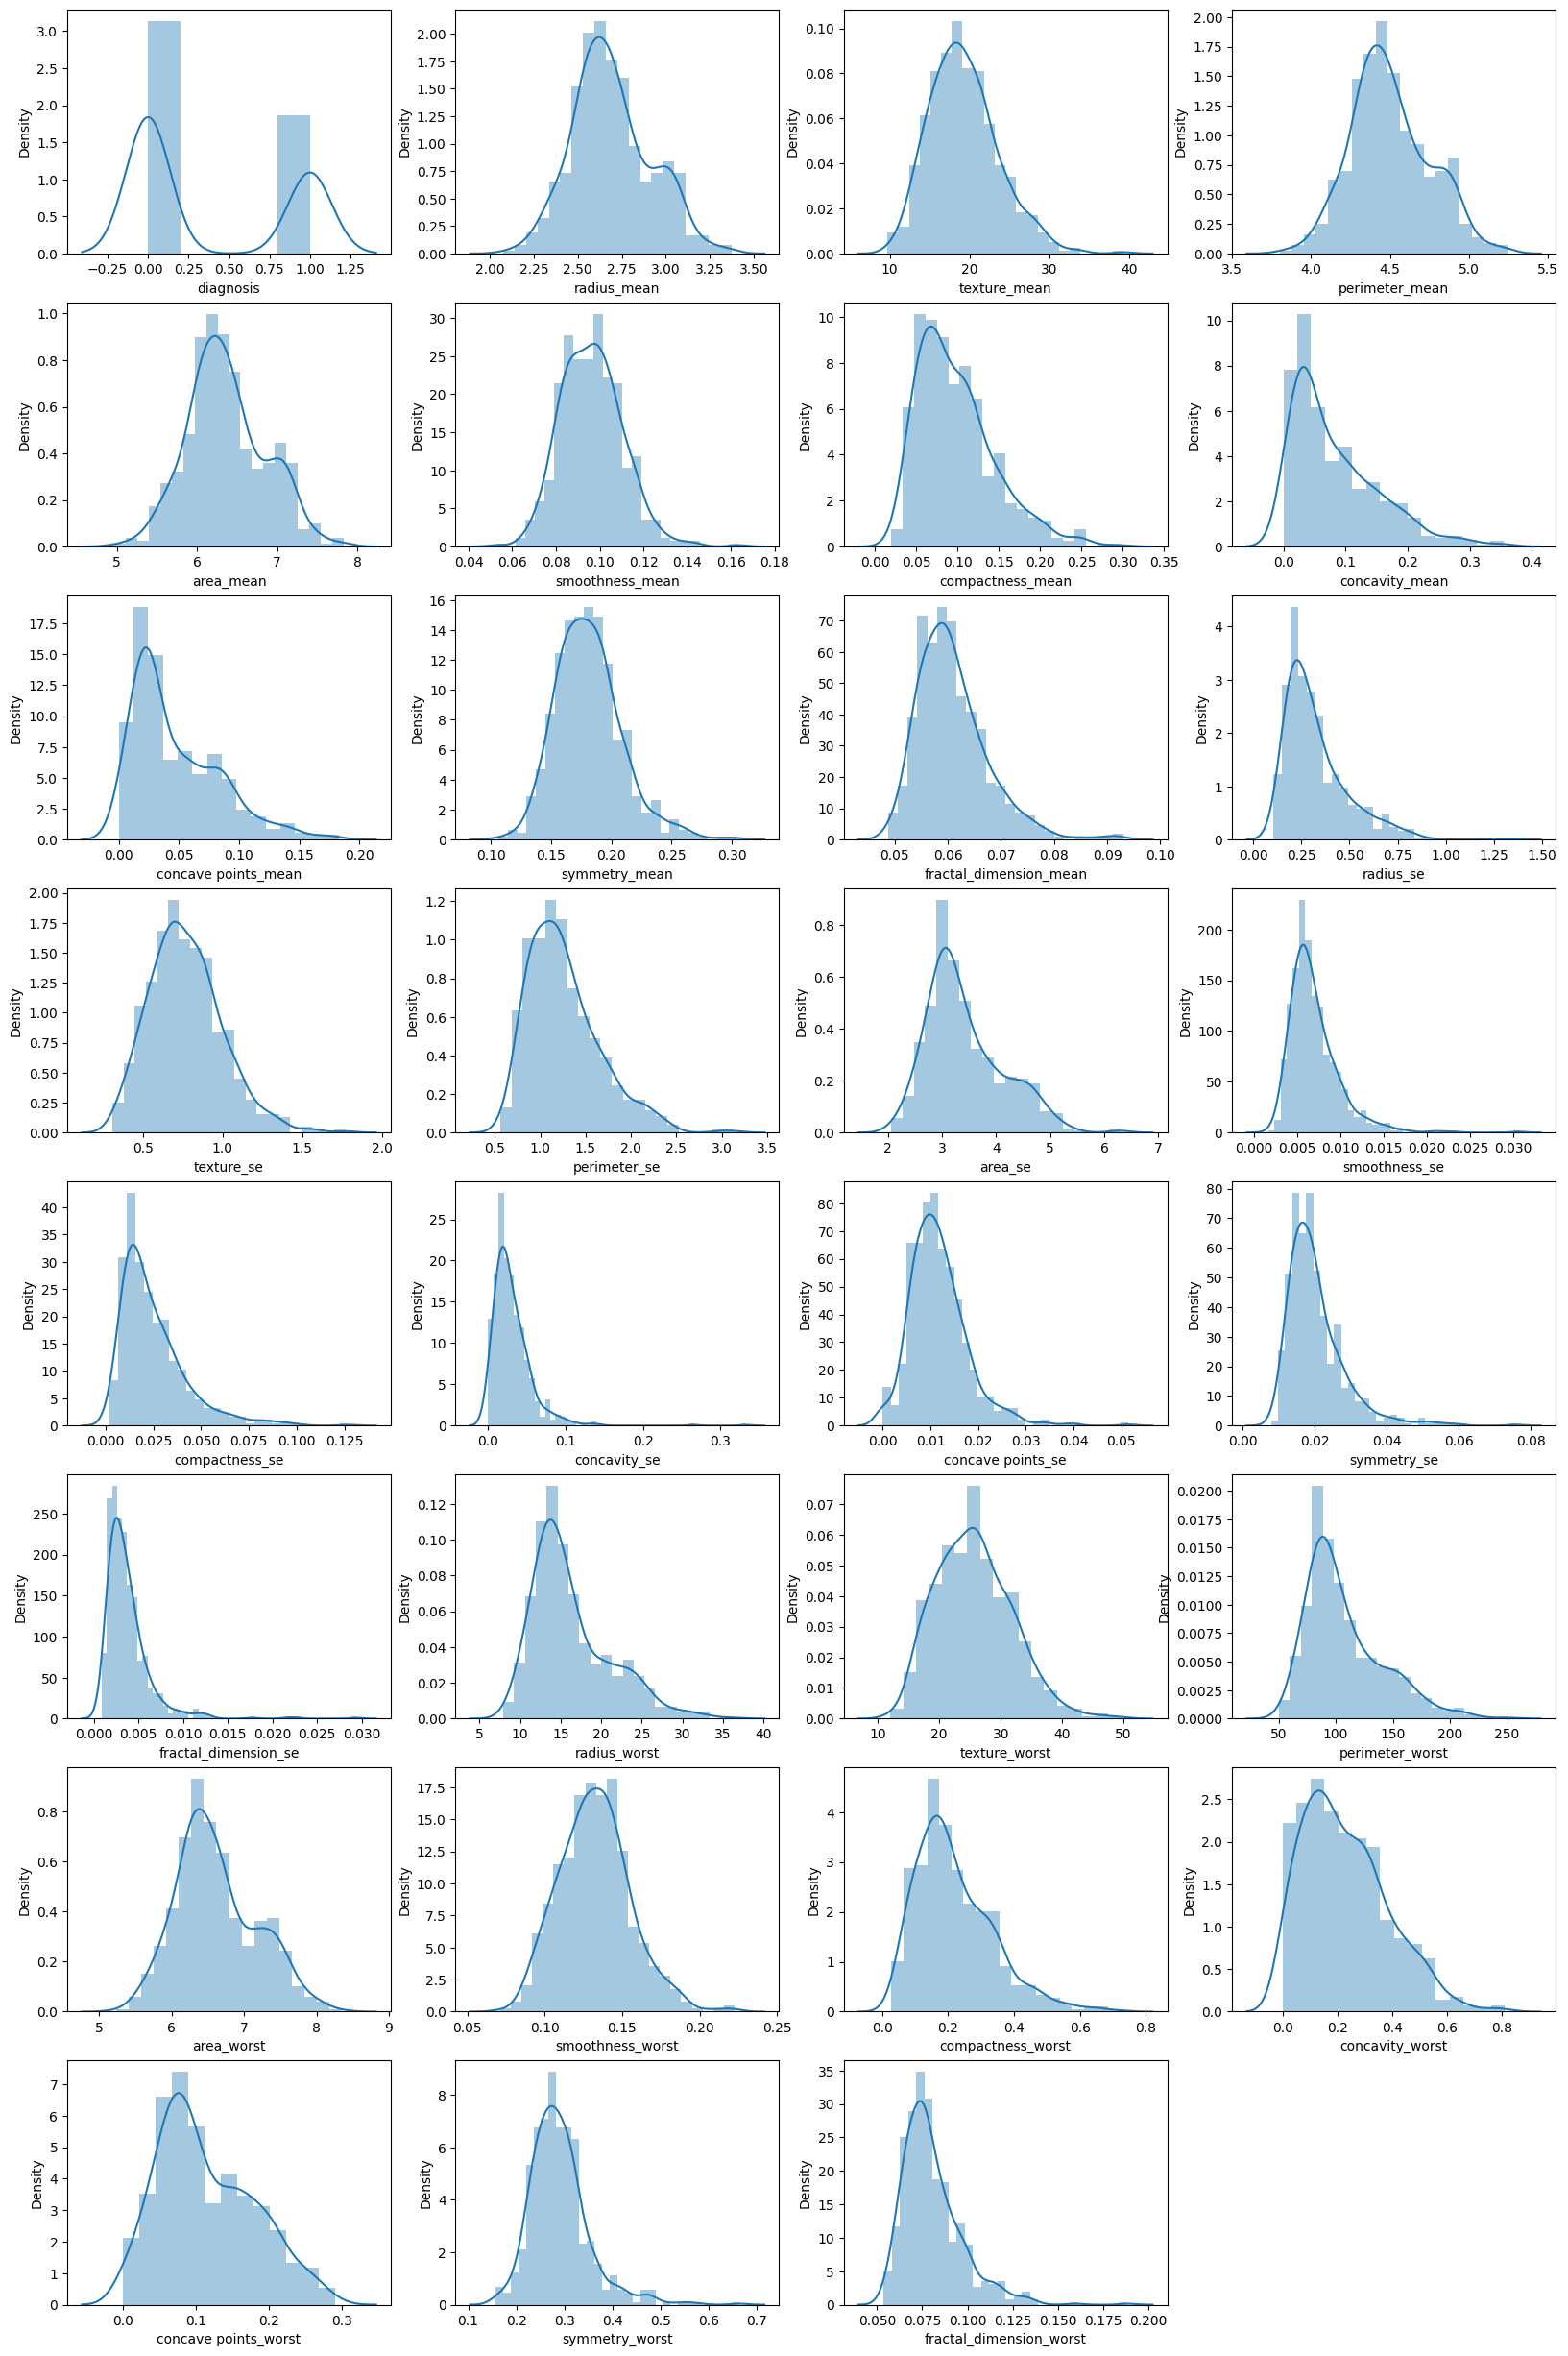

In [95]:
#Density plots
plt.figure(figsize=(20, 35))
col = 1
for i in df.columns:
    plt.subplot(9, 4, col)
    sns.distplot(df[i])
    col += 1

<Axes: >

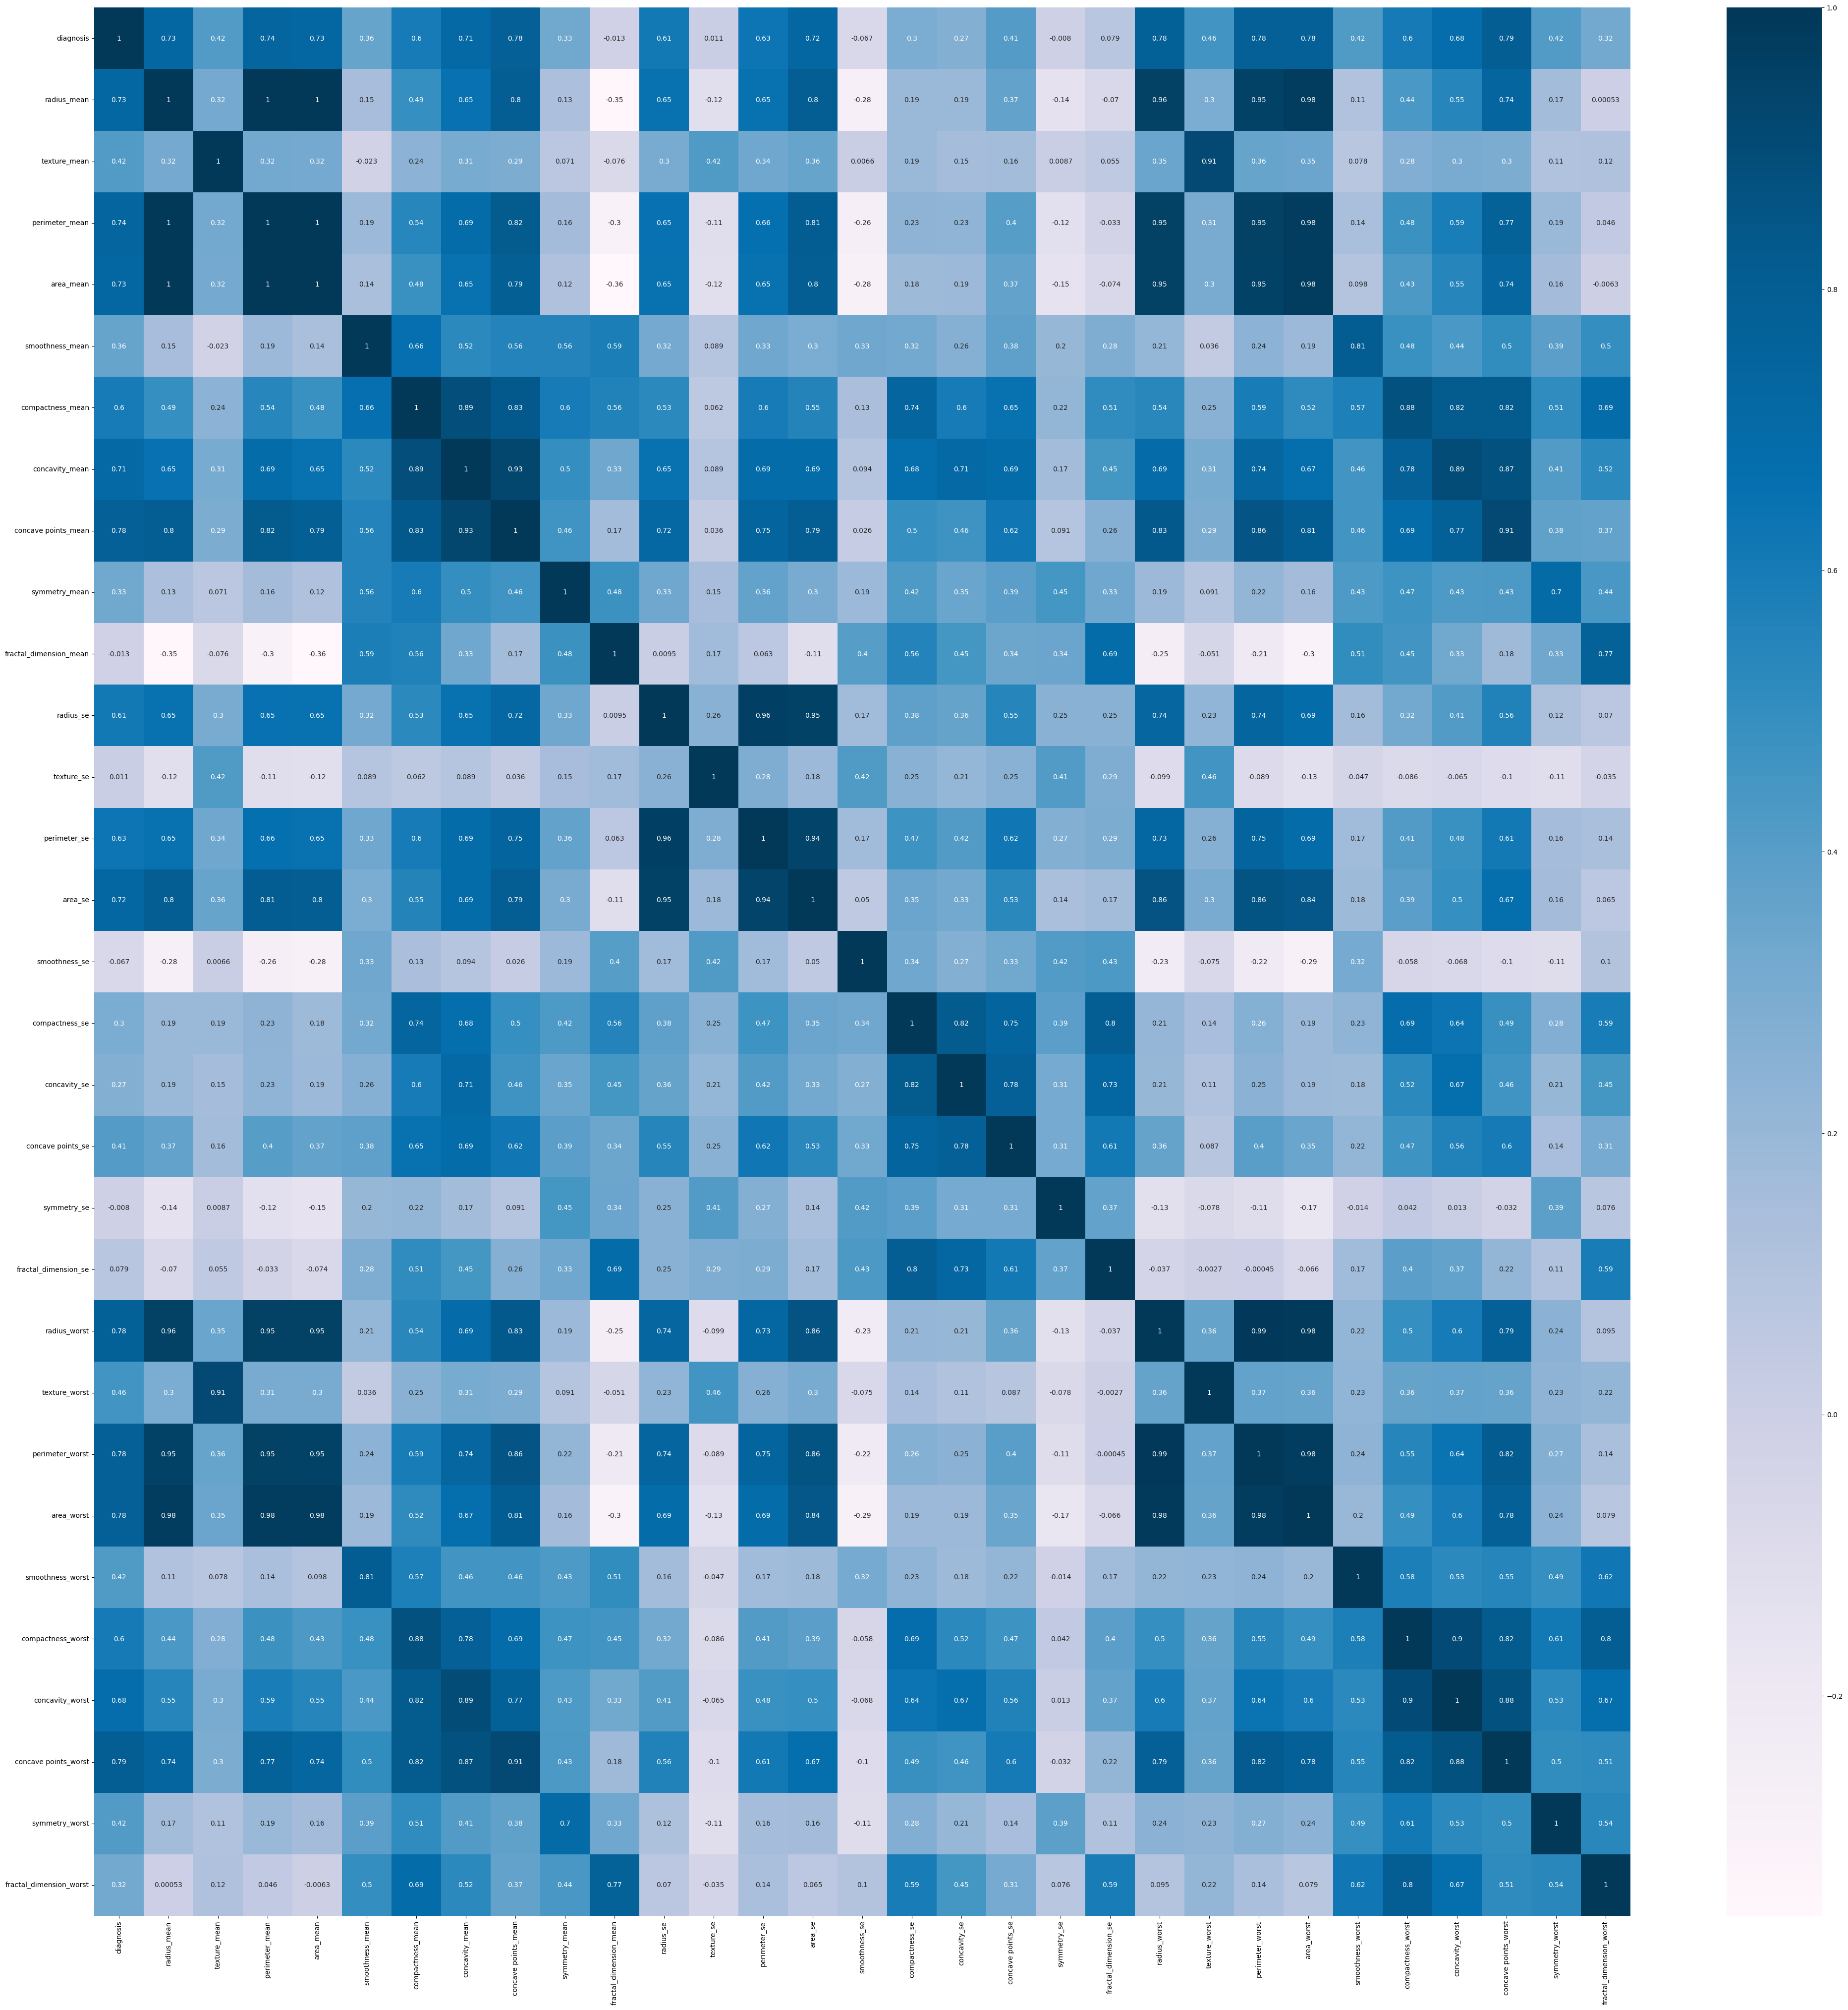

In [96]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),annot=True,cmap="PuBu")

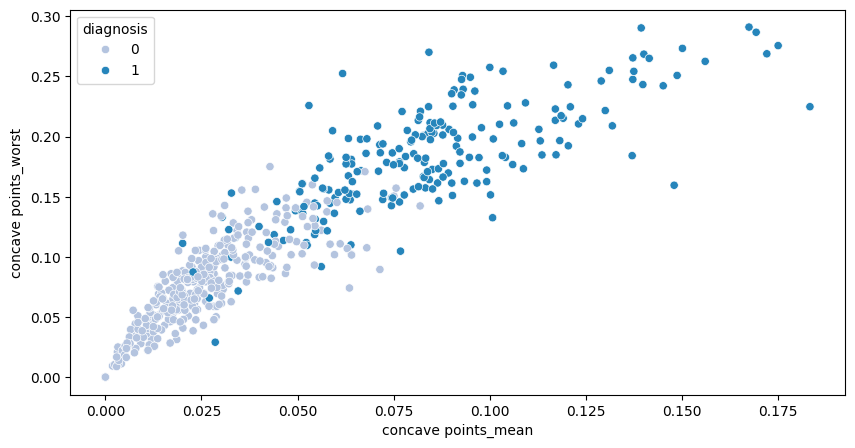

In [97]:

plt.figure(1 , figsize = (10 , 5) )
sns.scatterplot(
    data=df,
    x="concave points_mean",
    y="concave points_worst",
    hue="diagnosis",
    palette="PuBu"
);


--------------------------------------------------------------

Normalization


In [98]:
x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

# data = pd.DataFrame(x)
# target = pd.Series(y)
# # x_train, x_rest, y_train, y_rest = train_test_split(data, target, test_size=0.3)

# # x_val, x_test, y_val, y_test = train_test_split(x_rest, y_rest, test_size=0.5)

Feature scaling

In [99]:
cols = x.columns
ms = MinMaxScaler()

x = ms.fit_transform(x)

x = pd.DataFrame(x,columns =[cols])
x.head()

radius_mean texture_mean perimeter_mean area_mean smoothness_mean  \
0    0.669889     0.022658       0.704853  0.679091        0.593753   
1    0.768335     0.272574       0.759224  0.777607        0.289880   
2    0.736146     0.390260       0.744044  0.743495        0.514309   
3    0.341761     0.360839       0.389719  0.345566        0.811321   
4    0.758238     0.156578       0.770523  0.769858        0.430351   

  compactness_mean concavity_mean concave points_mean symmetry_mean  \
0         0.813663       0.738368            0.748616      0.686364   
1         0.203629       0.234445            0.369938      0.379798   
2         0.465372       0.506852            0.656539      0.509596   
3         0.831389       0.608382            0.545635      0.776263   
4         0.380177       0.508261            0.541191      0.378283   

  fractal_dimension_mean  ... radius_worst texture_worst perimeter_worst  \
0               0.610784  ...     0.620776      0.141525        0.668310   
1               0.144035  ...     0.606901      0.303571        0.539818   
2               0.214963  ...     0.556386      0.360075        0.508442   
3               1.000000  ...     0.248310      0.385928        0.241347   
4               0.190206  ...     0.519744      0.123934        0.506948   

  area_worst smoothness_worst compactness_worst concavity_worst  \
0   0.761908         0.601136          0.695530        0.662222   
1   0.751782         0.347553          0.207492        0.266563   
2   0.708663         0.483590          0.470483        0.458033   
3   0.356830         0.915472          0.859276        0.644100   
4   0.682584         0.437364          0.229639        0.414467   

  concave points_worst symmetry_worst fractal_dimension_worst  
0             0.912027       0.598462                0.435400  
1             0.639175       0.233590                0.234858  
2             0.835052       0.403706                0.225054  
3             0.884880       1.000000                0.785235  
4             0.558419       0.157500                0.151114  

[5 rows x 30 columns]

In [100]:
x_norm = preprocessing.normalize(x)

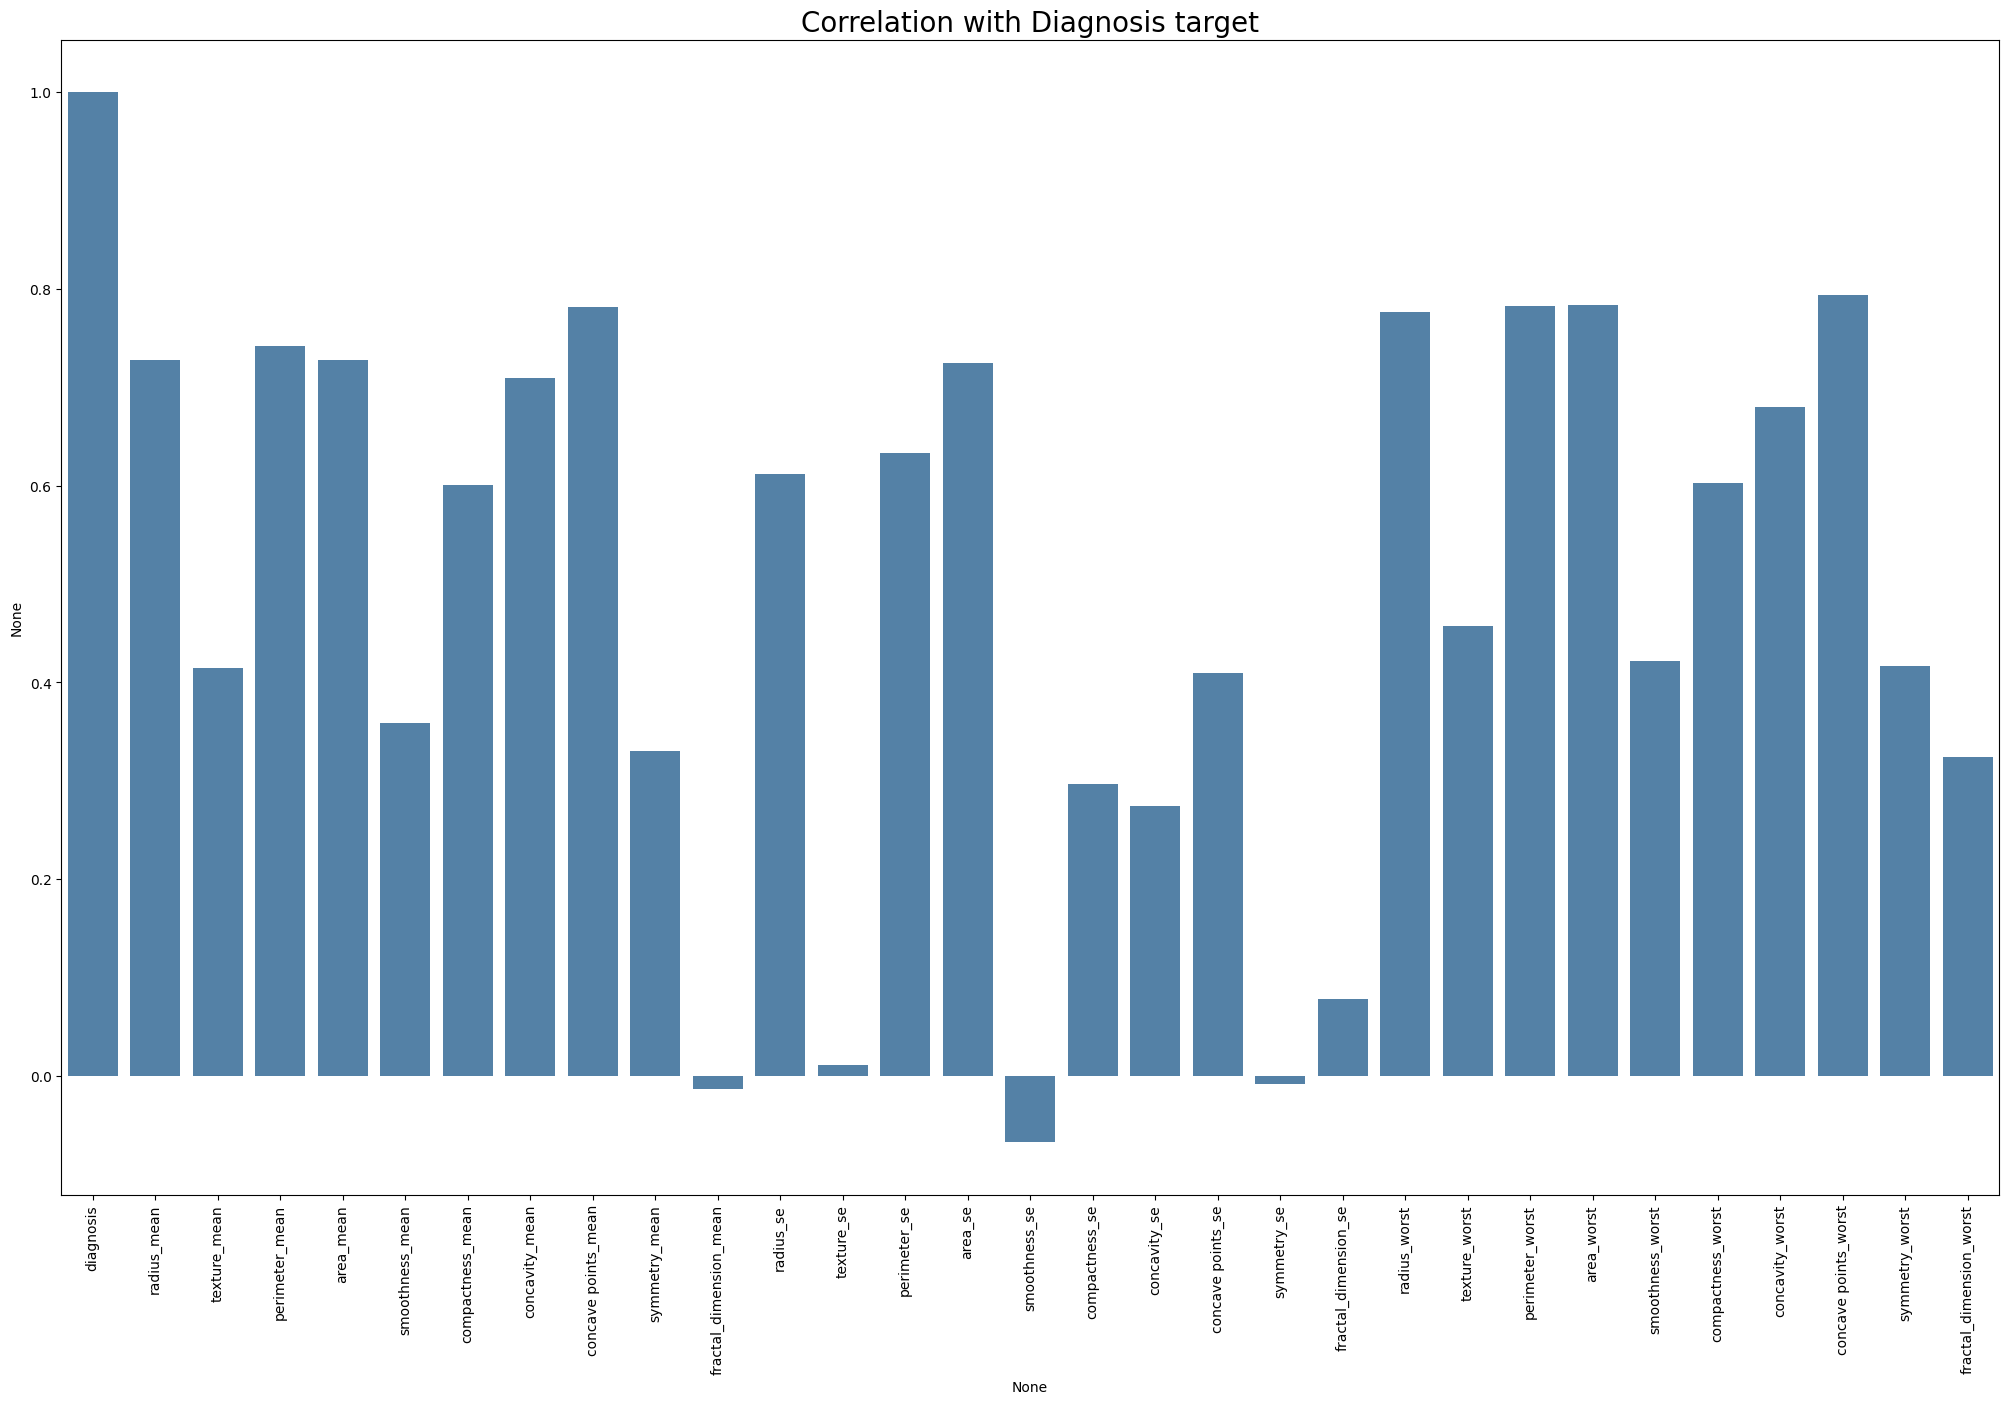

In [101]:
#plotting the correlation with target variable
plt.figure(figsize = (25, 15))
ax=sns.barplot(x=df.columns, y = df.corrwith(y),color="steelblue")
plt.title('Correlation with Diagnosis target', fontsize = 20)
q=plt.setp(ax.get_xticklabels(), rotation=90)

Clustering is a data mining technique which groups unlabeled data based on their similarities or differences.
K-means clustering is a common example of an exclusive clustering method where data points are assigned into K groups, where K represents the number of clusters based on the distance from each group’s centroid. The data points closest to a given centroid will be clustered under the same category.


In [102]:
# From The correlation heatmap it's obvious that
# the 2 most affecting features in the label are
# concave points_mean and concave points_worst

Exp 1: Cluster the dataset using k-means.

In [103]:
# k is the number of clusters you choose

# Fucntion to return the distance from center of clusters formed

def centers(x, center_1):
    dist = 0

    for i in range(len(x)):
        dist += (center_1[i] - x[i])**2

    return dist

In [104]:

def closest_center(x, centroids):
    center_dist = []

    for center_1 in centroids:
        dist = centers(x, center_1)
        center_dist.append(dist)
    # Get the index of the centroid with the smallest distance
    closest_index =  min(range(len(center_dist)), key=lambda x: center_dist[x])

    return closest_index

In [105]:
# def closest_center(x, centroids,first_cluster = False):
#     for i in x:
#         near_c = 0
#         near_dist = None
#         center_dist = []

#         for center_1 in centroids:
#             dist = centers(i, center_1)
#             center_dist.append(dist)
#     # Get the index of the centroid with the smallest distance
#     closest_index =  min(range(len(center_dist)), key=lambda x: center_dist[x])
#     if first_cluster:
#         i.append(near_c)
#     else:
#         i[-1] = near_c
#     return x

In [106]:

def compute_sum(data, center_1,center_2):
# Sum squared error
    SSE = 0

    for i,x in enumerate(data):

        z = center_1[center_2[i]]

        dist = centers(x, z)

        SSE += dist

    SSE /= len(data)
    return SSE

In [107]:

def ploting(centroids,closest_centroid):
        sns.scatterplot(x=[X[0] for X in x_norm],
                        y=[X[1] for X in x_norm],
                        data = df,
                        hue='diagnosis',
                        style=closest_centroid,
                        palette="PuBu",
                        legend=None)

        plt.plot([x[0] for x in centroids],
                [x[1] for x in centroids],
                'x',
                markersize=10,
                )
        plt.show()

In [108]:

def random_centers(dim,k):
    centers = []
    #  iterates over the number of clusters (k), generating one centroid in each iteration
    for i in range(k):
        center = []
        # iterates over the dimensions of each centroid (dim), generating a random value for each dimension.
        #  dim -> number of features
        for d in range(dim):
            rand = random.randint(0,100)
            center.append(rand)
        centers.append(center)
    return centers


In [109]:
def k_means_clustering(x,k):

    for k in k:
    # K-means
        iter = [100]

        center_2 = [0] * len(x)
        #  number of features
        num_centroid_dims = x.shape[1]
        SSE_list=[]
        # iterations =[]

        for n in iter:

            centroids = []
            random_indices = random.sample(range(x.shape[0]), 2)
            for i in random_indices:
                centroids.append(x[i])

            for i in range(n):

                # Loop over each data point
                for j in range(len(x)):
                    x1 = x[j]

                    # Get the closest centroid
                    closest_centroid = closest_center(x1, centroids)

                    # Assign the centroid to the data point.
                    center_2[j] = closest_centroid

                # Loop over centroids and compute the new ones.
                for c in range(len(centroids)):
                    # Get all the data points belonging to a particular cluster
                    cluster_data = [x[h] for h in range(len(x)) if center_2[h] == c]

                    # Initialize the list to hold the new centroid
                    new_centroid = [0] * len(centroids[0])

                    # Compute the average of cluster members to compute new centroid
                    # Loop over dimensions of data
                    for dim in range(num_centroid_dims):
                        dim_sum = [x[dim] for x in cluster_data]
                        dim_sum = sum(dim_sum) / len(dim_sum)
                        new_centroid[dim] = dim_sum
                        # print(new_centroid)
                    # assign the new centroid
                        centroids[c] = new_centroid

                # Compute the SSE for the iteration
                sse = compute_sum(x, centroids, center_2)
                # print(sse)
                SSE_list.append(sse)
            print(centroids)
            print(closest_centroid)
            ploting(centroids , closest_centroid)







In [110]:
# import numpy as np
# import matplotlib.pyplot as plt

# def euclidean_distance(x1, x2):
#     return np.sqrt(np.sum((x1-x2)**2))

# class KMeans:

#     def __init__(self, K=5, max_iters=100, plot_steps=False):
#         self.K = K
#         self.max_iters = max_iters
#         self.plot_steps = plot_steps

#         # list of sample indices for each cluster
#         self.clusters = [[] for _ in range(self.K)]

#         # the centers (mean vector) for each cluster
#         self.centroids = []


#     def predict(self, X):
#         self.X = X
#         self.n_samples, self.n_features = X.shape

#         # initialize
#         random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
#         self.centroids = [self.X[idx] for idx in random_sample_idxs]

#         # optimize clusters
#         for _ in range(self.max_iters):
#             # assign samples to closest centroids (create clusters)
#             self.clusters = self._create_clusters(self.centroids)

#             if self.plot_steps:
#                 self.plot()

#             # calculate new centroids from the clusters
#             centroids_old = self.centroids
#             self.centroids = self._get_centroids(self.clusters)

#             if self._is_converged(centroids_old, self.centroids):
#                 break

#             if self.plot_steps:
#                 self.plot()

#         # classify samples as the index of their clusters
#         return self._get_cluster_labels(self.clusters)


#     def _get_cluster_labels(self, clusters):
#         # each sample will get the label of the cluster it was assigned to
#         labels = np.empty(self.n_samples)
#         for cluster_idx, cluster in enumerate(clusters):
#             for sample_idx in cluster:
#                 labels[sample_idx] = cluster_idx

#         return labels


#     def _create_clusters(self, centroids):
#         # assign the samples to the closest centroids
#         clusters = [[] for _ in range(self.K)]
#         for idx, sample in enumerate(self.X):
#             centroid_idx = self._closest_centroid(sample, centroids)
#             clusters[centroid_idx].append(idx)
#         return clusters

#     def _closest_centroid(self, sample, centroids):
#         # distance of the current sample to each centroid
#         distances = [euclidean_distance(sample, point) for point in centroids]
#         closest_idx = np.argmin(distances)
#         return closest_idx


#     def _get_centroids(self, clusters):
#         # assign mean value of clusters to centroids
#         centroids = np.zeros((self.K, self.n_features))
#         for cluster_idx, cluster in enumerate(clusters):
#             cluster_mean = np.mean(self.X[cluster], axis=0)
#             centroids[cluster_idx] = cluster_mean
#         return centroids

#     def _is_converged(self, centroids_old, centroids):
#         # distances between old and new centroids, for all centroids
#         distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
#         return sum(distances) == 0

#     def plot(self):
#         fig, ax = plt.subplots(figsize=(12, 8))

#         for i, index in enumerate(self.clusters):
#             point = self.X[index].T
#             ax.scatter(*point)

#         for point in self.centroids:
#             ax.scatter(*point, marker="x", color="black", linewidth=2)

#         plt.show()


# # Testing
# if __name__ == "__main__":
#     np.random.seed(42)
#     from sklearn.datasets import make_blobs

#     X, y = make_blobs(
#         centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40
#     )
#     print(X.shape)

#     clusters = len(np.unique(y))
#     print(clusters)

#     k = KMeans(K=clusters, max_iters=150, plot_steps=True)
#     y_pred = k.predict(X)

#     k.plot()


K-means Built in


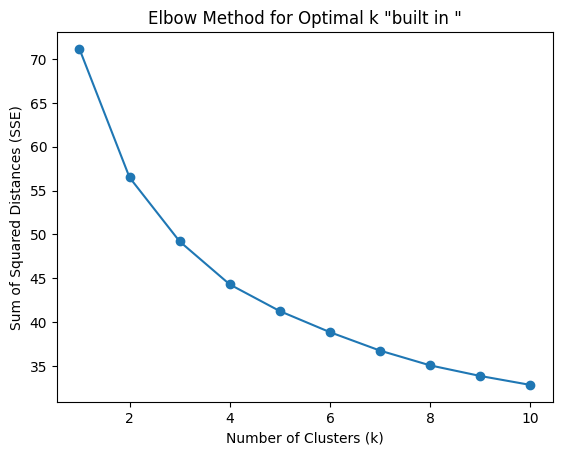

In [111]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
k_values = range(1, 11)
sse_ideal = []

for k in k_values:
    # Using scikit-learn's KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_norm)
    sse_ideal.append(kmeans.inertia_)

# Plot the SSE values for different k
plt.plot(k_values, sse_ideal, marker='o')
plt.title('Elbow Method for Optimal k "built in "')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.show()

Unsupervised Learning Method that is often used to reduce the dimensionality of the dataset by transforming a large set into a lower dimensional set that still contains most of the information of the large set

- n_components: number of dimensions we want to have after the transformation
- we don't use predict, we use 'transform'
- 'fit' method only needs x and not y since this is unsupervised learning
- 'transform' gets x only too

- fit:
   - gets mean
   -centre the data
   -calculate the covariance
   -get eigen vectors and values
   -sort eigen vectors according to the eigen values (decreasing order)
   -sort eigen values
   -store the first 'k' components for the first k dimensions that we want
   
-transform:
   -centre data
   - project data: dot product
   

   



Experiment 1 : Cluster the dataset using k-means

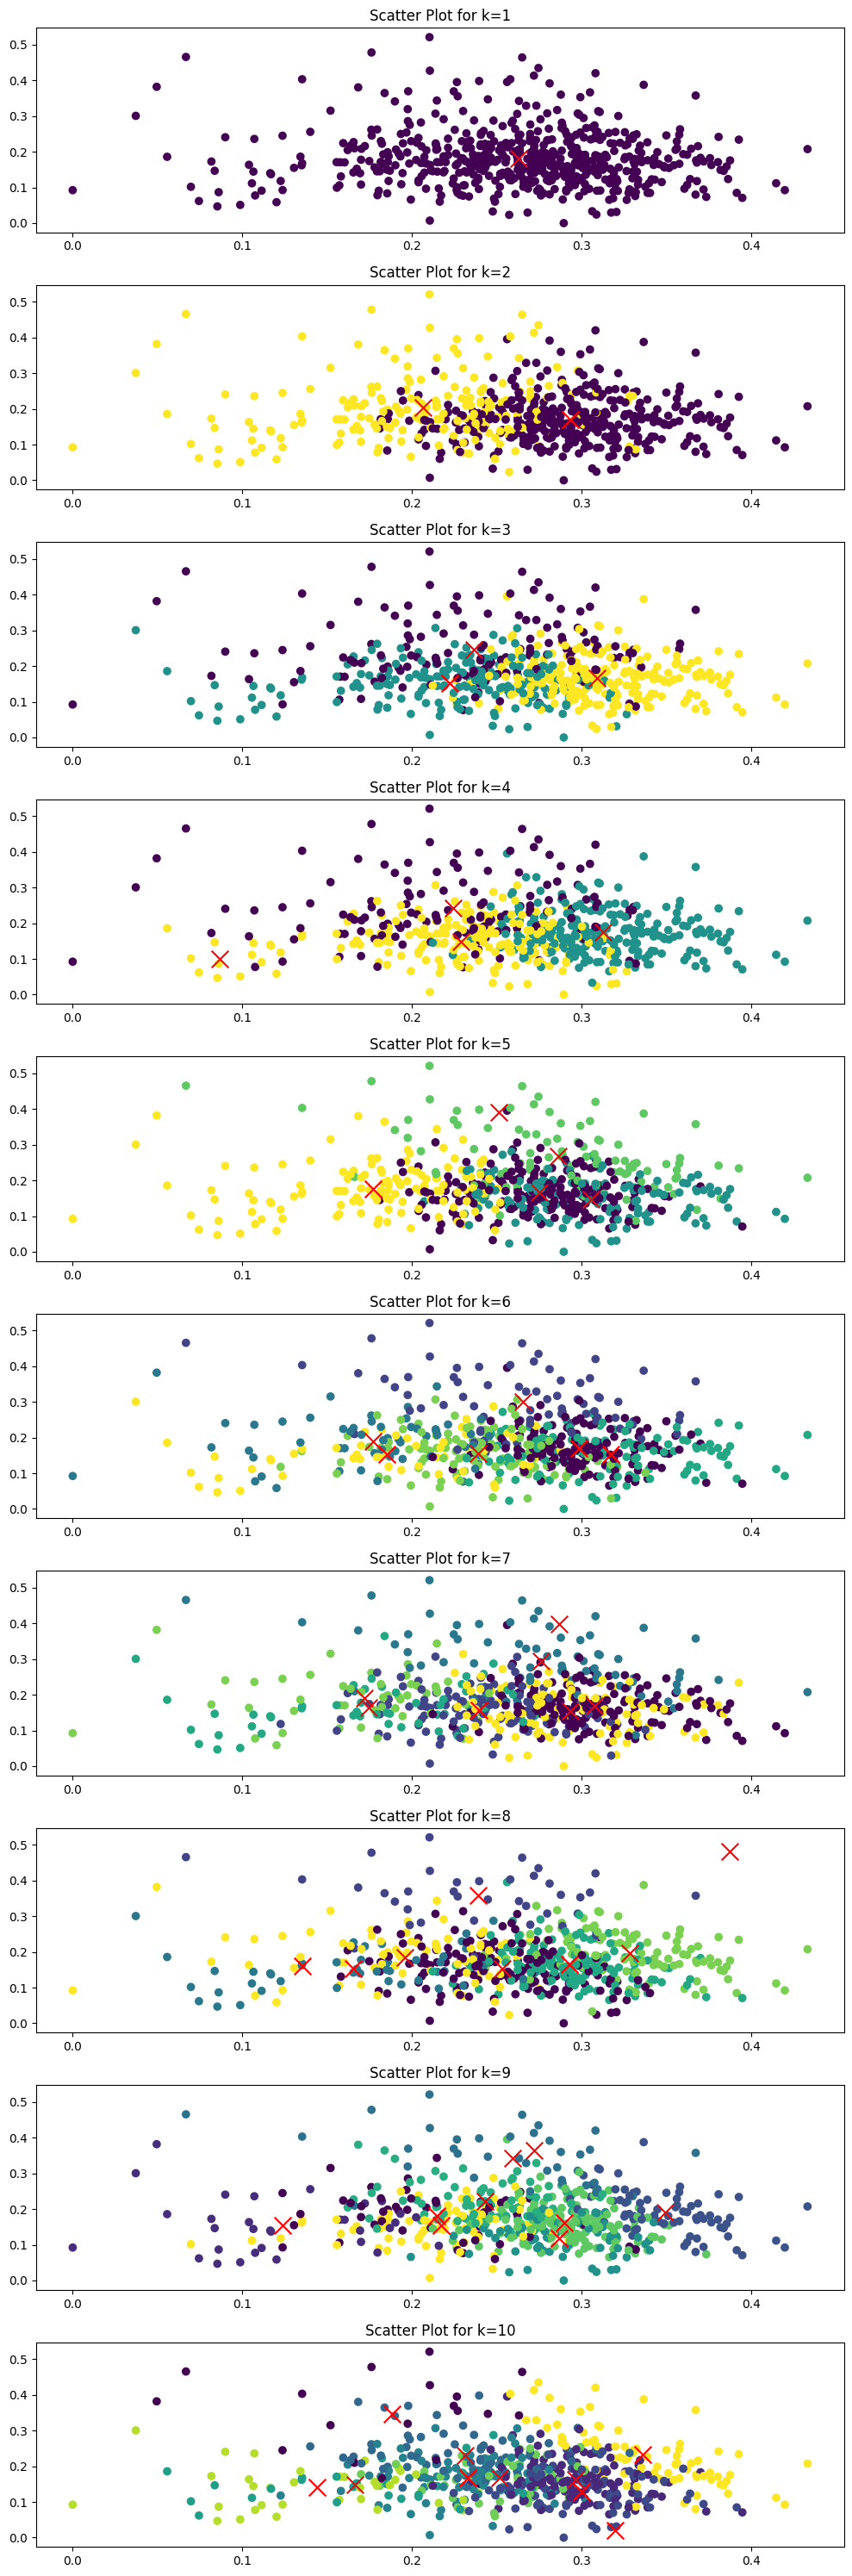

In [130]:
import numpy as np
import matplotlib.pyplot as plt

class kMeansClustering:

    def __init__(self, k=3):
        self.k = k
        self.centroids = None

    @staticmethod
    def distance(data_point, centroids):
        return np.sqrt(np.sum((centroids - data_point)**2, axis=1))

    def fit(self, x, max_iterations=200):
        self.centroids = np.random.uniform(np.amin(x, axis=0), np.amax(x, axis=0), size=(self.k, x.shape[1]))

        for _ in range(max_iterations):
            y = []

            for data_point in x:
                distances = kMeansClustering.distance(data_point, self.centroids)
                cluster_num = np.argmin(distances)
                y.append(cluster_num)

            y = np.array(y)

            cluster_indices = []

            for i in range(self.k):
                cluster_indices.append(np.argwhere(y == i))

            cluster_centres = []

            for i, indices in enumerate(cluster_indices):
                if len(indices) == 0:
                    cluster_centres.append(self.centroids[i])
                else:
                    cluster_centres.append(np.mean(x[indices], axis=0)[0])

            if np.max(self.centroids - np.array(cluster_centres)) < 0.0001:
                break
            else:
                self.centroids = np.array(cluster_centres)

        sse = 0
        for i, indices in enumerate(cluster_indices):
            if len(indices) > 0:
                sse += np.sum(np.sum((x[indices] - self.centroids[i])**2, axis=1))

        return y, sse



# Try different values of k and use the elbow method
sse_values = []
k_values = range(1, 11)  # Try k values from 1 to 10

# Plot scatter plot and SSE values for different k values
fig, axs = plt.subplots(len(k_values), 1, figsize=(10, 3 * len(k_values)))

for i, k in enumerate(k_values):
    kmeans = kMeansClustering(k=k)
    labels, sse = kmeans.fit(x_norm)
    sse_values.append(sse)



    # Scatter plot
    axs[i].scatter(x_norm[:, 0], x_norm[:, 1], c=labels, cmap='viridis')
    axs[i].scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x', s=200)
    axs[i].set_title(f'Scatter Plot for k={k}')


plt.tight_layout()
plt.show()


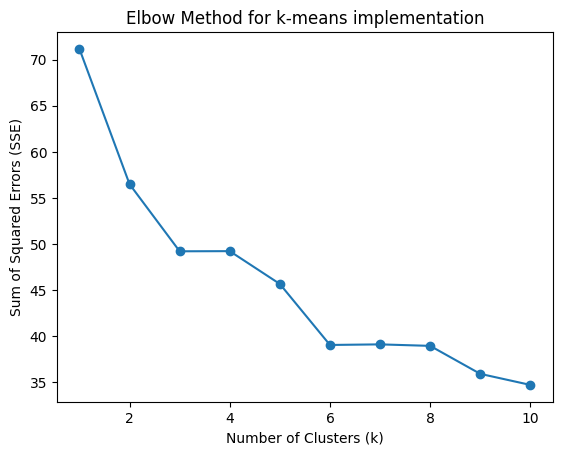

In [131]:
# Plot the SSE values for different k values
plt.plot(k_values, sse_values, marker='o')
plt.title('Elbow Method for k-means implementation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

----------------------------  PCA ------------------------------------


Shape of X: (569, 30)
Shape of transformed X: (569, 2)


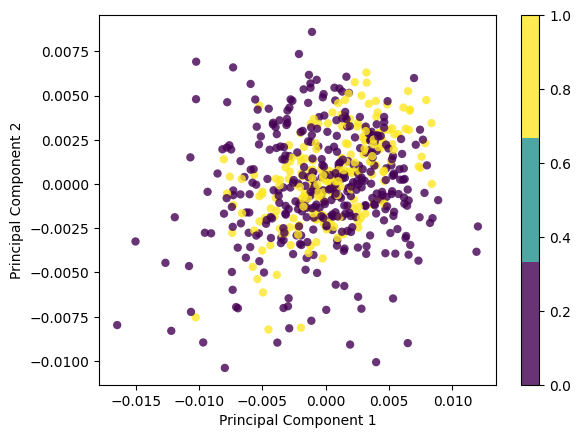

In [132]:
import numpy as np


class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # mean centering
        self.mean = np.mean(X, axis=0)
        X = X -  self.mean

        # covariance, functions needs samples as columns
        cov = np.cov(X.T)

        # eigenvectors, eigenvalues
        self.eigenvectors, self.eigenvalues = np.linalg.eig(cov)

        # eigenvectors v = [:, i] column vector, transpose this for easier calculations
        self.eigenvectors = self.eigenvectors.T

        # sort eigenvectors
        idxs = np.argsort(self.eigenvalues)[::-1]
        self.eigenvalues = self.eigenvalues[idxs]
        self.eigenvectors = self.eigenvectors[idxs]

        self.components = self.eigenvectors[:self.n_components]

    def transform(self, X):
        # projects data
        X = X - self.mean
        return np.dot(X, self.components.T)



pca = PCA(2)
pca.fit(x_norm)
X_projected = pca.transform(x_norm)

print("Shape of X:", x_norm.shape)
print("Shape of transformed X:", X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(
     x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

K- Clustering after PCA

In [115]:

# # Try different values of principal components and k
# num_components_values = [1, 2, 3]
# k_values = range(1, 6)

# # Plot scatter plots for different principal components and k values
# fig, axs = plt.subplots(len(num_components_values), len(k_values), figsize=(15, 10))

# for i, num_components in enumerate(num_components_values):
#     pca = PCA(n_components=num_components)
#     pca.fit(x_norm)
#     X_projected = pca.transform(x_norm)

#     for j, k in enumerate(k_values):
#         kmeans = kMeansClustering(k=k)
#         labels, _ = kmeans.fit(X_projected)

#         # Check if X_projected is 1D or 2D
#         if X_projected.shape[1] == 1:
#             axs[i, j].scatter(X_projected, np.zeros_like(X_projected), c=labels, cmap='viridis')
#             axs[i, j].scatter(kmeans.centroids[:, 0], np.zeros_like(kmeans.centroids[:, 0]), c='red', marker='x', s=200)
#         else:
#             axs[i, j].scatter(X_projected[:, 0], X_projected[:, 1], c=labels, cmap='viridis')
#             axs[i, j].scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x', s=200)

#         axs[i, j].set_title(f'PCA Components={num_components}, k={k}')

# plt.tight_layout()
# plt.show()

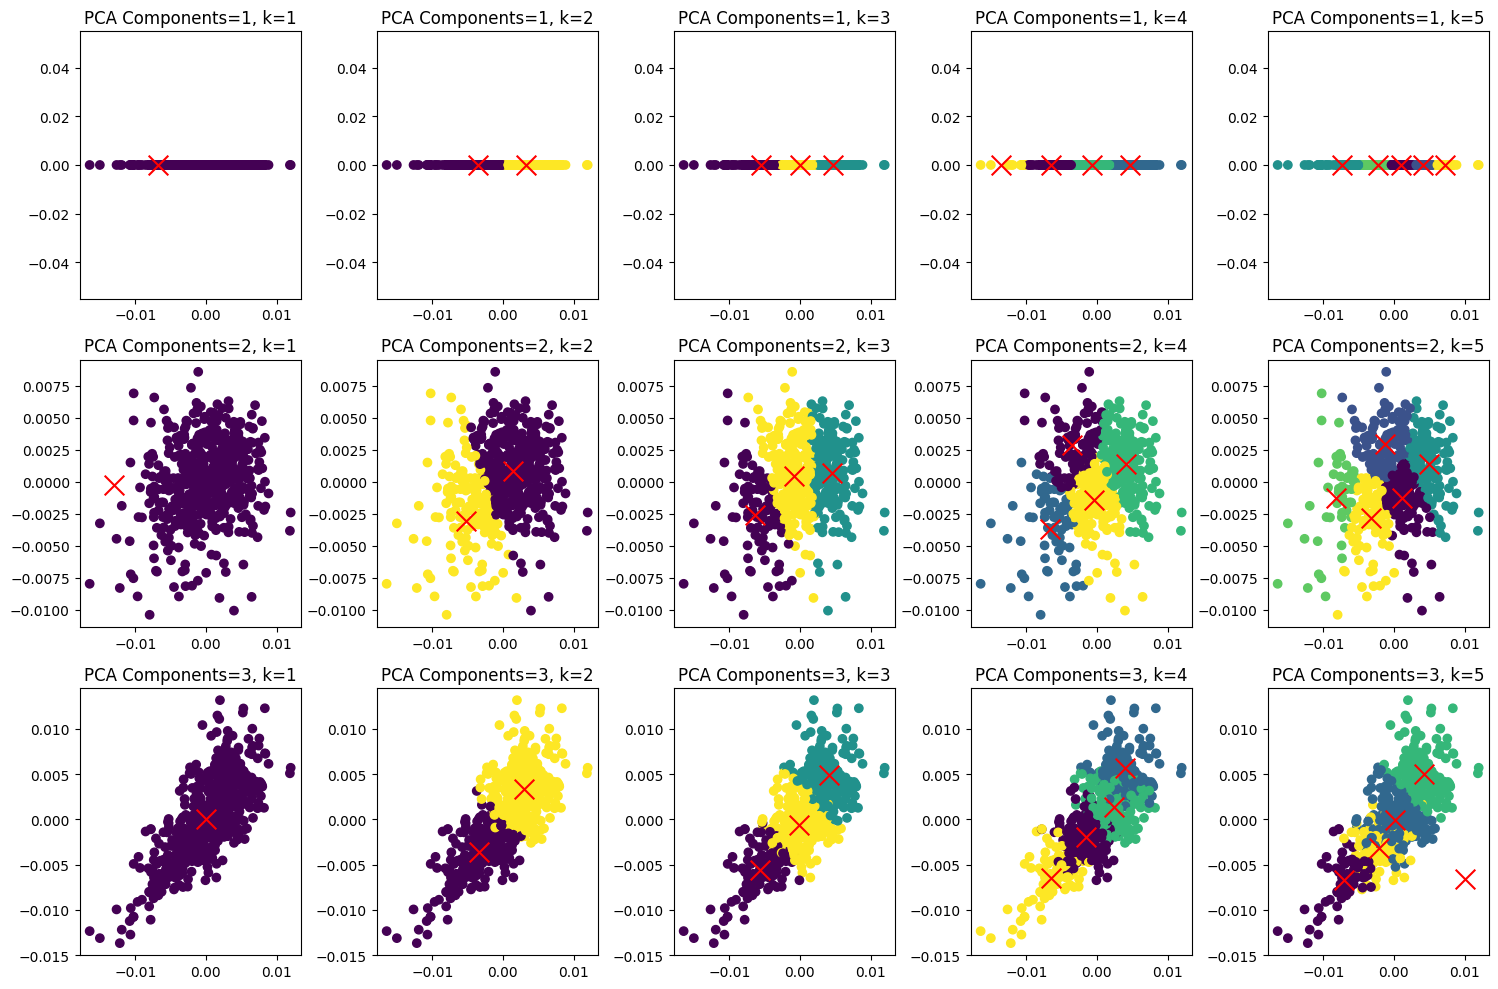

In [133]:
# Try different values of principal components and k
num_components_values = [1, 2, 3]
k_values = range(1, 6) 
# Plot scatter plots for different principal components and k values
fig, axs = plt.subplots(len(num_components_values), len(k_values), figsize=(15, 10))

sse_pca =[]

for i, num_components in enumerate(num_components_values):
    pca = PCA(n_components=num_components)
    pca.fit(x_norm)
    X_projected = pca.transform(x_norm)

    for j, k in enumerate(k_values):
        kmeans = kMeansClustering(k=k)
        labels, sse= kmeans.fit(X_projected)

        if num_components == 1:
            axs[i, k - 1].scatter(X_projected[:, 0], np.zeros_like(X_projected[:, 0]), c=labels, cmap='viridis')
            axs[i, k - 1].scatter(kmeans.centroids[:, 0], np.zeros_like(kmeans.centroids[:, 0]),
                                  c='red', marker='x', s=200)
        elif num_components == 2:
            axs[i, k - 1].scatter(X_projected[:, 0], X_projected[:, 1], c=labels, cmap='viridis')
            axs[i, k - 1].scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
                                  c='red', marker='x', s=200)
        else:
            axs[i, k - 1].scatter(X_projected[:, 0], X_projected[:, 2], c=labels, cmap='viridis')
            axs[i, k - 1].scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 2],
                                  c='red', marker='x', s=200)

        axs[i, k - 1].set_title(f'PCA Components={num_components}, k={k}')

        sse_pca.append(sse)



plt.tight_layout()
plt.show()


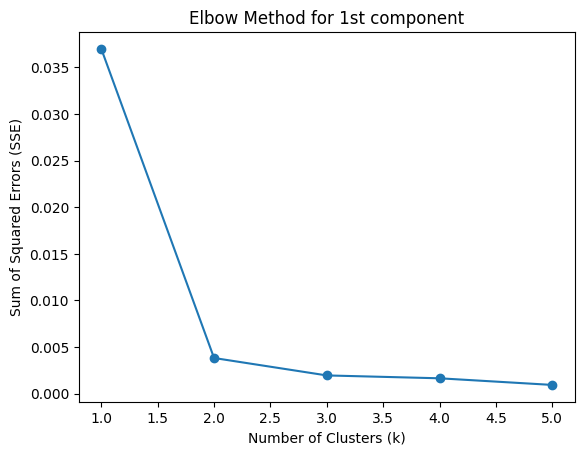

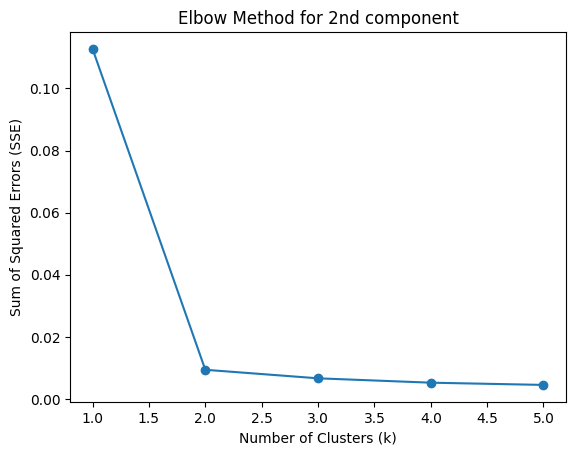

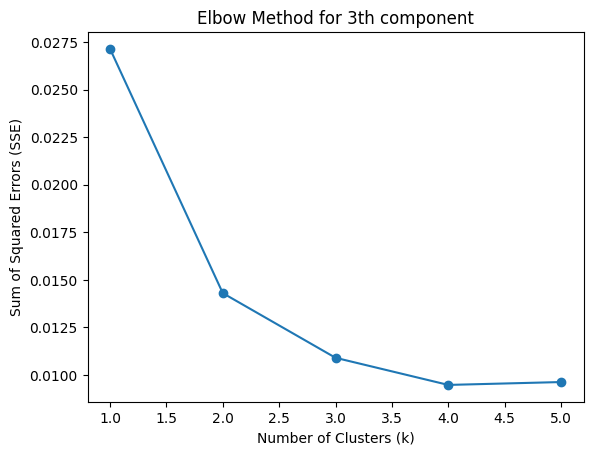

In [134]:
# Elbow method for first component
plt.plot(k_values, sse_pca[0:5], marker='o')
plt.title('Elbow Method for 1st component')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()  

# Elbow method for Second component
plt.plot(k_values, sse_pca[5:10], marker='o')
plt.title('Elbow Method for 2nd component')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()  

# Elbow method for Third component
plt.plot(k_values, sse_pca[10:15], marker='o')
plt.title('Elbow Method for 3th component')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()  

Compareing between SSE in both 

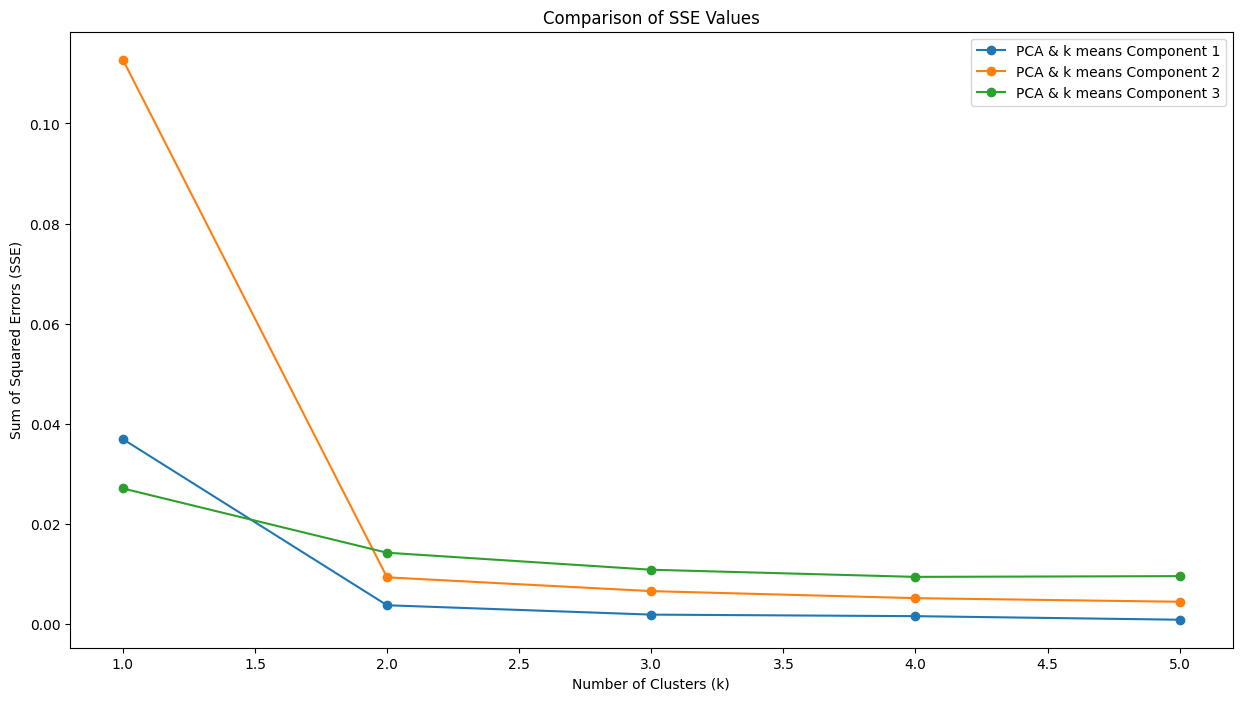

In [135]:
plt.figure(figsize=(15, 8))
# plt.plot(range(1, 6), sse_values[0:5], marker='o', label='Clustring with k means only')
plt.plot(range(1, 6), sse_pca[0:5], marker='o', label='PCA & k means Component 1')
plt.plot(range(1, 6), sse_pca[5:10], marker='o', label='PCA & k means Component 2')
plt.plot(range(1, 6), sse_pca[10:15], marker='o', label='PCA & k means Component 3')
plt.title('Comparison of SSE Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.legend()
plt.show()

In [119]:
#Comapring the number of components with the SSE
# avg =[]

# for i in range(5):
#     avg.append(sse_pca[i])
#     avg.append(sse_pca[i+5])
#     avg.append(sse_pca[i+10])

# plt.plot(num_components_values,avg[0:3])
# plt.plot(num_components_values,avg[3:6])
# plt.plot(num_components_values,avg[6:9])
# plt.plot(num_components_values,avg[9:12])
# plt.plot(num_components_values,avg[12:15])


# plt.xlabel("Number of Components")
# plt.ylabel("Sum of Squares of k values")
# plt.show()

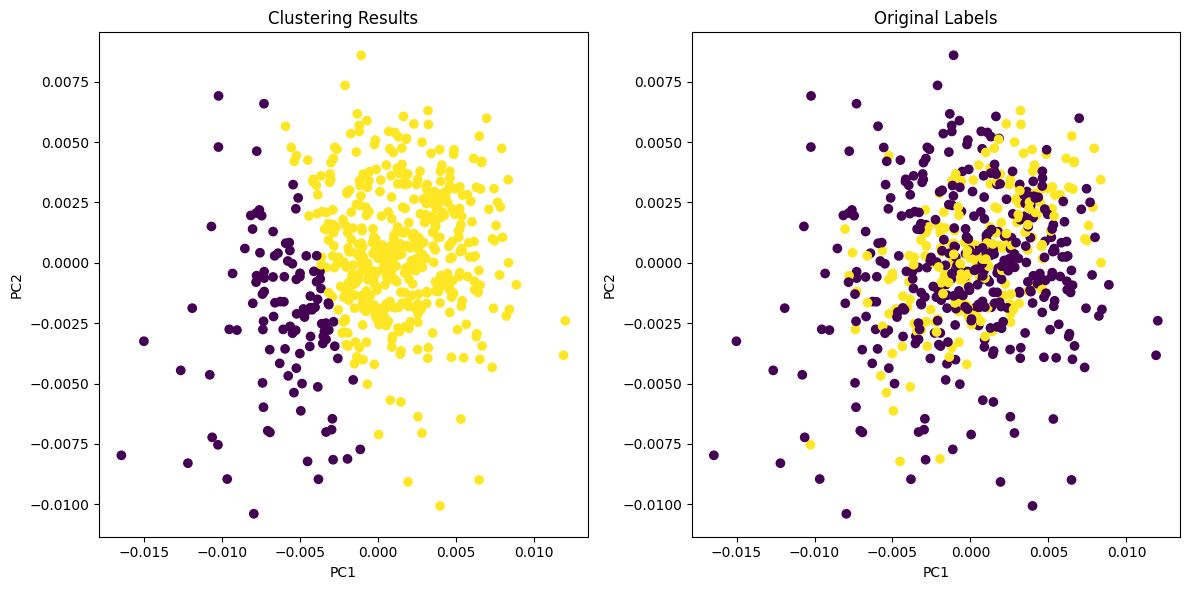

In [136]:
pca = PCA(n_components=2)
pca.fit(x_norm)
X_projected = pca.transform(x_norm)
pca_data = pd.DataFrame(data=X_projected, columns=['PC1', 'PC2'])


kmeans = kMeansClustering(k=2)
clusters,_ = kmeans.fit(X_projected)
# print(len(clusters))

# Comparison DataFrame
comparison_df = pd.DataFrame({'Cluster Labels': clusters, 'Original Labels': y})

# Visualize the comparison
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].scatter(pca_data['PC1'], pca_data['PC2'], c=clusters, cmap='viridis')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('Clustering Results')

axes[1].scatter(pca_data['PC1'], pca_data['PC2'], c=y, cmap='viridis')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Original Labels')

plt.tight_layout()
plt.show()